# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


### Descripción 
Este proyecto busca identificar y validar, mediante datos, las iniciativas con mayor potencial para incrementar los ingresos de una tienda online. A partir de un conjunto de hipótesis generadas junto al equipo de marketing, se aplicarán métodos de priorización (ICE y RICE) para seleccionar las más prometedoras. Posteriormente, se llevará a cabo un test A/B para medir su impacto real sobre indicadores clave como la conversión, el ticket promedio y el ingreso acumulado, asegurando que las decisiones estratégicas se fundamenten en evidencia estadística.


In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from datetime import timedelta

## Cargue de datasets y exploracion inicial

In [2]:
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep = ";")
ordenes = pd.read_csv('/datasets/orders_us.csv')
visitas = pd.read_csv('/datasets/visits_us.csv')

In [3]:
hipotesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
ordenes.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
visitas.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Tras realizar el cargue y la visualización de los datos, se observa que los datasets están completos y no presentan valores vacíos. Sin embargo, para el desarrollo de este proyecto se realizará el cambio de tipo de dato en las columnas de fecha (DATE), ya que actualmente están en formato object, y convertirlas a tipo datetime permitirá una mejor manipulación y análisis.

In [9]:
ordenes['date'] = pd.to_datetime(ordenes['date'])
visitas['date'] = pd.to_datetime(visitas['date'])

In [10]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [11]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Parte 1. Priorizar hipótesis

Objetivo de esta sección: Evaluar rápidamente qué hipótesis deberían implementarse primero para maximizar el impacto.

Metodología:

ICE: prioriza ideas por impacto y confianza, penalizando el esfuerzo.

RICE: añade la dimensión de alcance (Reach), útil cuando diferentes ideas afectan a distintos tamaños de audiencia.

Compararemos ambos rankings y extraeremos conclusiones sobre cómo cambia la priorización.

La priorización ayuda a elegir qué ideas implementar primero.

ICE: (Impact × Confidence) / Effort
RICE: (Reach × Impact × Confidence) / Effort

In [12]:
hipotesis.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [13]:
# Cálculo de ICE y RICE
hipotesis['ICE'] = (hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

hipotesis['RICE'] = (
    hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence']
) / hipotesis['Effort']

In [14]:
hipotesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [15]:
# Rankings
ice_rank = hipotesis.sort_values(by='ICE', ascending=False)
rice_rank = hipotesis.sort_values(by='RICE', ascending=False)

display(ice_rank[['Hypothesis', 'ICE']].reset_index(drop=True))
display(rice_rank[['Hypothesis', 'RICE']].reset_index(drop=True))

,Hypothesis,ICE
0,Launch a promotion that gives users discounts ...,16.200000
1,Add two new channels for attracting traffic. T...,13.333333
2,Add a subscription form to all the main pages....,11.200000
3,Show banners with current offers and sales on ...,8.000000
4,Add product recommendation blocks to the store...,7.000000
5,Launch your own delivery service. This will sh...,2.000000
6,Add a customer review page. This will increase...,1.333333
7,Change the category structure. This will incre...,1.125000
8,Change the background color on the main page. ...,1.000000


,Hypothesis,RICE
0,Add a subscription form to all the main pages....,112.0
1,Add product recommendation blocks to the store...,56.0
2,Add two new channels for attracting traffic. T...,40.0
3,Show banners with current offers and sales on ...,40.0
4,Launch a promotion that gives users discounts ...,16.2
5,Change the category structure. This will incre...,9.0
6,Launch your own delivery service. This will sh...,4.0
7,Add a customer review page. This will increase...,4.0
8,Change the background color on the main page. ...,3.0


### Explicacion 

Comparando ambos rankings, se observa que el factor Reach tiene un peso determinante en RICE, elevando las hipótesis con mayor alcance en el orden de prioridad. En cambio, el método ICE prioriza propuestas con una alta combinación de impacto (Impact) y confianza (Confidence) en relación con un bajo esfuerzo (Effort), lo que puede favorecer ideas más rápidas de implementar aunque con menor alcance.

Dada esta diferencia, se recomienda priorizar las hipótesis que se mantienen en posiciones altas en ambos métodos, ya que combinan un alcance relevante con alta viabilidad y potencial de impacto, maximizando el retorno esperado en el corto y mediano plazo.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - La carga y exploración inicial de los datos está bien estructurada, con conversión correcta de tipos de fecha que facilitará el análisis posterior. Buen inicio para asegurar un flujo de trabajo sólido. 
</div>


## Parte 2. Análisis del test A/B

In [16]:
print(ordenes.duplicated().sum())

0


In [17]:
print(visitas.duplicated().sum())

0


### 2.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [18]:
# Ingreso acumulado
cumulative_revenue = (
    ordenes.groupby(['group', 'date'])['revenue']
    .sum()
    .groupby(level=0)
    .cumsum()
    .reset_index()
)
cumulative_revenue.head()

,group,date,revenue
0,A,2019-08-01,2356.8
1,A,2019-08-02,3860.3
2,A,2019-08-03,5675.5
3,A,2019-08-04,6822.1
4,A,2019-08-05,8810.2


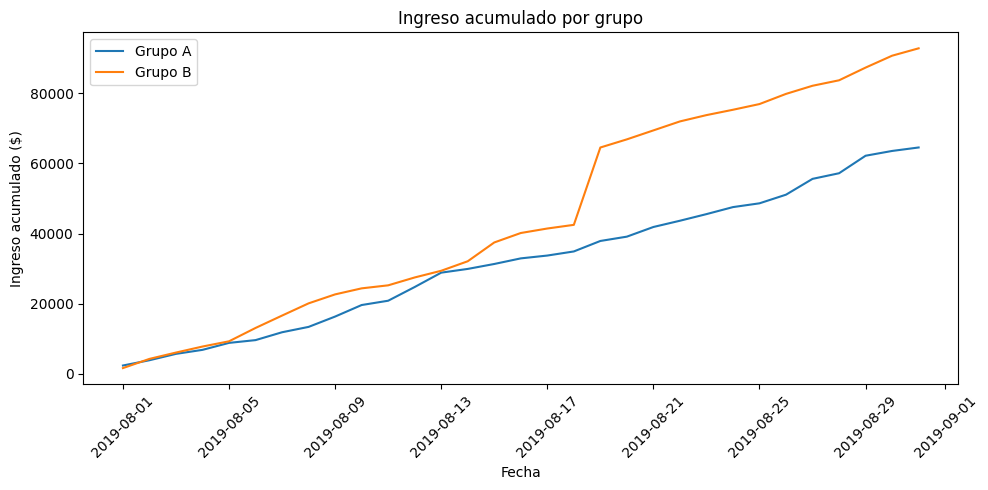

In [19]:
plt.figure(figsize=(10,5))
for grp in ['A', 'B']:
    grp_data = cumulative_revenue[cumulative_revenue['group']==grp]
    plt.plot(grp_data['date'], grp_data['revenue'], label=f'Grupo {grp}')
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Explicacion.

Se observa que, durante la fase inicial de la prueba, ambos grupos presentaron un crecimiento de ingresos acumulados similar, con variaciones menores. Sin embargo, a partir de mediados del periodo, el Grupo B experimentó un incremento pronunciado, probablemente asociado a un cambio puntual en la estrategia o a un evento específico, lo que generó una brecha sostenida frente al Grupo A. Esta diferencia se mantuvo y amplió hacia el final de la prueba, evidenciando un mayor rendimiento acumulado del Grupo B.


<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - La representación y el análisis del ingreso acumulado por grupo están bien realizados, destacando claramente la diferencia de rendimiento y apoyando la interpretación con observaciones pertinentes. 
</div>


### 2.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [20]:
# ticket medio diario
daily = ordenes.groupby(['group', 'date'])['revenue'].mean()
daily.head()

group  date      
A      2019-08-01    98.200000
       2019-08-02    75.175000
       2019-08-03    75.633333
       2019-08-04    71.662500
       2019-08-05    79.524000
Name: revenue, dtype: float64

In [21]:
# media acumulada por grupo, sin duplicar el nivel 'group'
avg_order = (
    daily
      .groupby(level=0, group_keys=False)        # evita la 2ª capa 'group'
      .apply(lambda s: s.expanding().mean())     # media acumulada
      .reset_index(name='revenue')               # pasa índice a columnas
)

avg_order.head()

,group,date,revenue
0,A,2019-08-01,98.200000
1,A,2019-08-02,86.687500
2,A,2019-08-03,83.002778
3,A,2019-08-04,80.167708
4,A,2019-08-05,80.038967


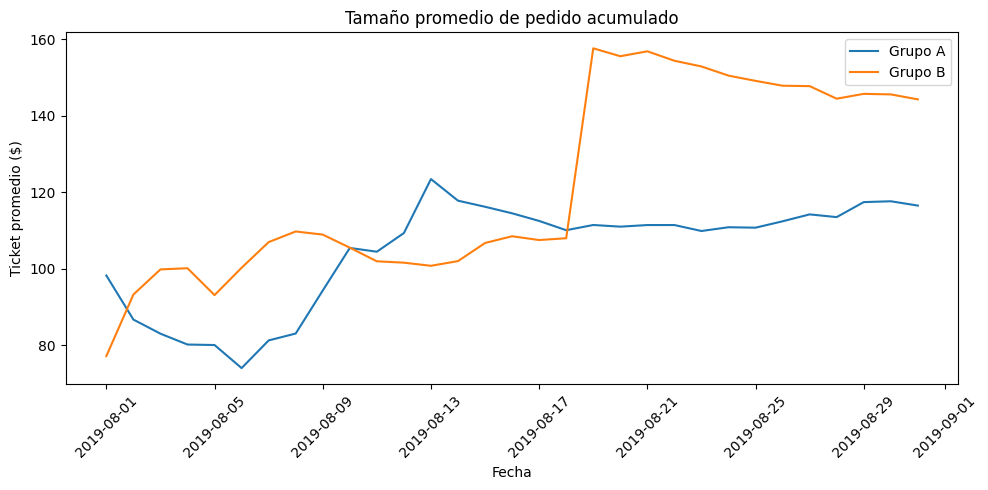

In [22]:
# gráfico
plt.figure(figsize=(10,5))
for g in ['A', 'B']:
    mask = avg_order['group'] == g
    plt.plot(avg_order.loc[mask, 'date'], avg_order.loc[mask, 'revenue'], label=f'Grupo {g}')
plt.title('Tamaño promedio de pedido acumulado')
plt.xlabel('Fecha'); plt.ylabel('Ticket promedio ($)')
plt.legend(); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

Explicacion 

El análisis del ticket promedio diario muestra que el Grupo A inicia con valores cercanos a los ( 98), pero experimenta una caída en los primeros días, alcanzando mínimos alrededor de ( 71–  75), para luego recuperarse gradualmente. En contraste, el Grupo B arranca con un ticket más bajo, pero presenta una tendencia más estable en la primera mitad del período y un incremento abrupto alrededor del 18 de agosto, superando ampliamente al Grupo A. El gráfico confirma esta diferencia: mientras el Grupo A tiene un comportamiento más oscilante y sin cambios bruscos, el Grupo B experimenta un crecimiento sostenido tras el salto, manteniendo un ticket promedio significativamente más alto. Esto podría indicar el efecto de una intervención o estrategia aplicada a mitad del experimento que impactó directamente en el valor medio de compra del Grupo B.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - El cálculo y visualización del ticket promedio acumulado están correctamente implementados, y el análisis describe con claridad la evolución y diferencias entre grupos, aportando una interpretación coherente del posible impacto de la estrategia aplicada. 
</div>


### 2.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

Qué haremos: Medir la diferencia relativa de AOV entre B y A.

Por qué: Una métrica normalizada facilita ver ventaja percentual.

Cómo: Calculamos (B - A)/A día a día.

In [23]:
merged_avg = (
    avg_order.pivot(index='date', columns='group', values='revenue')
    .reset_index()
)

merged_avg.head()

group,date,A,B
0,2019-08-01,98.200000,77.142857
1,2019-08-02,86.687500,93.233929
2,2019-08-03,83.002778,99.797619
3,2019-08-04,80.167708,100.102626
4,2019-08-05,80.038967,93.082101


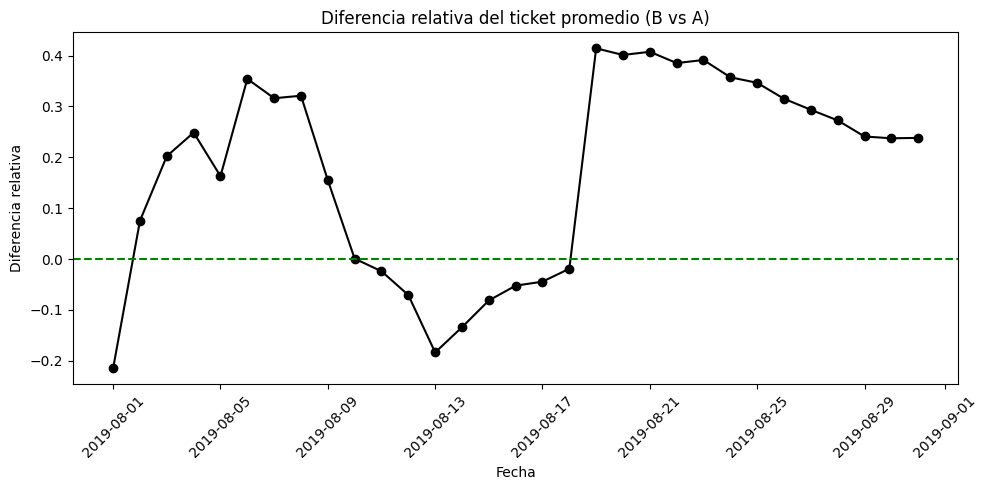

In [24]:
merged_avg['rel_diff'] = (merged_avg['B'] - merged_avg['A']) / merged_avg['A']

plt.figure(figsize=(10,5))
plt.plot(merged_avg['date'], merged_avg['rel_diff'], marker='o',color='black')
plt.axhline(0, color='green', linestyle='--')
plt.title('Diferencia relativa del ticket promedio (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Expliacion 

La diferencia relativa del ticket promedio entre los grupos muestra que, aunque en los primeros días hubo oscilaciones y periodos en los que el Grupo A superó ligeramente al Grupo B, a partir del 18 de agosto el Grupo B presenta un incremento significativo y sostenido, manteniéndose por encima con una ventaja relativa cercana al 40%. Esto sugiere que a partir de esa fecha se implementó una acción o condición que impactó de forma positiva en el valor medio de compra del Grupo B, generando una mejora consistente frente al Grupo A.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - El cálculo de la diferencia relativa y su representación gráfica están correctamente ejecutados, y el análisis describe con precisión el cambio sostenido a favor del Grupo B, destacando su posible origen en una intervención puntual. 
</div>


### 2.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

Qué haremos: Calcular la tasa de conversión diaria.

Por qué: Conversion Rate (CR) es el KPI principal de muchos e‑commerce.

Cómo: CR = pedidos / visitas por grupo y fecha.

In [25]:
ordenes.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [26]:
# Pedidos por día y grupo
orders_per_day = ordenes.groupby(['group', 'date']).agg({'transactionId':'nunique'}).reset_index()
orders_per_day.rename(columns={'transactionId':'orders'}, inplace=True)

orders_per_day.head()

,group,date,orders
0,A,2019-08-01,24
1,A,2019-08-02,20
2,A,2019-08-03,24
3,A,2019-08-04,16
4,A,2019-08-05,25


In [27]:
# Unimos con visits
daily = pd.merge(visitas, orders_per_day, on=['group','date'], how='left').fillna(0)
daily['conversion'] = daily['orders'] / daily['visits']

daily.head()

,date,group,visits,orders,conversion
0,2019-08-01,A,719,24,0.033380
1,2019-08-02,A,619,20,0.032310
2,2019-08-03,A,507,24,0.047337
3,2019-08-04,A,717,16,0.022315
4,2019-08-05,A,756,25,0.033069


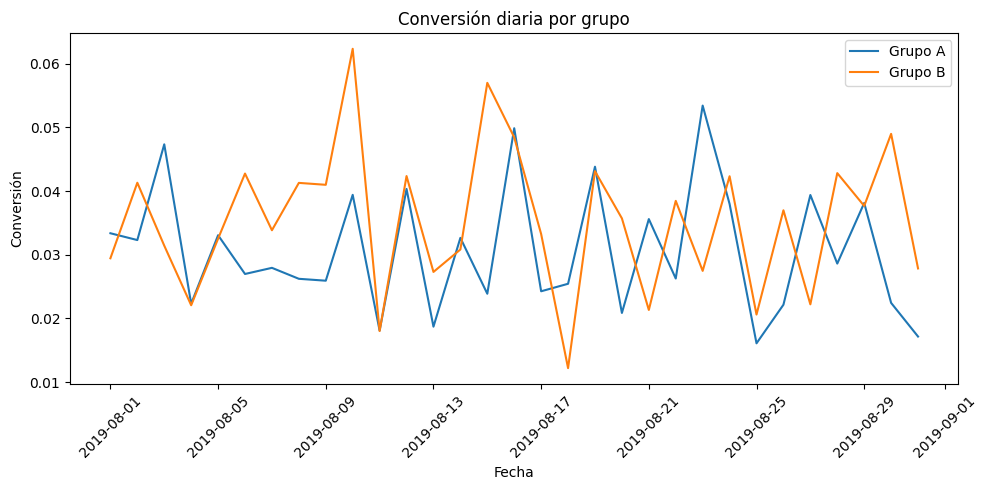

In [28]:
plt.figure(figsize=(10,5))
for grp in ['A','B']:
    grp_data = daily[daily['group']==grp]
    plt.plot(grp_data['date'], grp_data['conversion'], label=f'Grupo {grp}')
plt.title('Conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Conversión')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explicacion 

La tasa de conversión diaria muestra que el Grupo B mantiene en la mayoría de los días un rendimiento superior al Grupo A, con picos de conversión que superan el 4,5% e incluso alcanzan el 5% en ciertas fechas, mientras que el Grupo A rara vez supera el 4%. Aunque ambos grupos presentan variaciones importantes a lo largo del periodo, la ventaja sostenida del Grupo B sugiere que las acciones o cambios aplicados a este grupo han tenido un impacto positivo en la captación de clientes, aumentando la probabilidad de conversión de forma más consistente.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - El cálculo de la tasa de conversión y su visualización están bien estructurados, mostrando con claridad la ventaja sostenida del Grupo B y respaldando el análisis con observaciones pertinentes sobre su impacto positivo en la captación de clientes. 
</div>


### 2.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

Qué haremos: Visualizar la distribución de pedidos por usuario.

Por qué: Usuarios con muchos pedidos pueden sesgar la conversión.

Cómo: groupby sobre visitorId y dispersión para detectar heavy buyers.

In [29]:
orders_per_user = ordenes.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_per_user.rename(columns={'transactionId':'orders'}, inplace=True)

orders_per_user.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


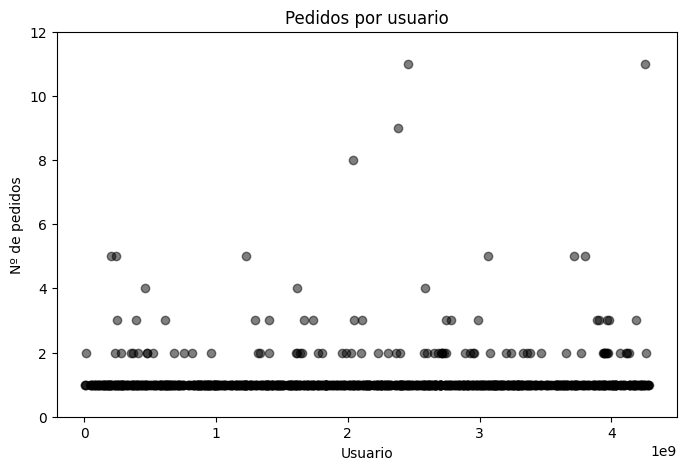

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'], alpha=0.5, color = 'black')
plt.title('Pedidos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Nº de pedidos')
plt.ylim(0, orders_per_user['orders'].max()+1)
plt.show()

Expliacion.

El gráfico evidencia que la mayoría de los usuarios realizan únicamente una compra, mientras que un grupo reducido efectúa dos pedidos. La proporción de usuarios que realizan más de dos compras es considerablemente menor, mostrando un patrón de repetición de compra bajo, con pocos casos extremos que superan las 8 o incluso 10 compras.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - El análisis y visualización de pedidos por usuario está correctamente implementado, identificando de forma clara el patrón de compra y la presencia de pocos usuarios con compras muy repetidas. 
</div>


### 2.6 Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [31]:

q95_orders = np.percentile(orders_per_user['orders'], 95)
q99_orders = np.percentile(orders_per_user['orders'], 99)
print(f'Percentil 95: {q95_orders}, Percentil 99: {q99_orders}')


Percentil 95: 2.0, Percentil 99: 4.0


Explicacion.

En este contexto, podemos considerar como anómalos (o outliers) a los usuarios cuyo número de pedidos es superior al percentil 99, es decir, más de 4 pedidos.
Esto significa que estos casos son extremadamente raros y representan un comportamiento fuera del patrón típico de compra.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - El cálculo de percentiles está bien aplicado y la definición del umbral para identificar anomalías es clara y adecuada al comportamiento observado en los datos. 
</div>


### 2.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

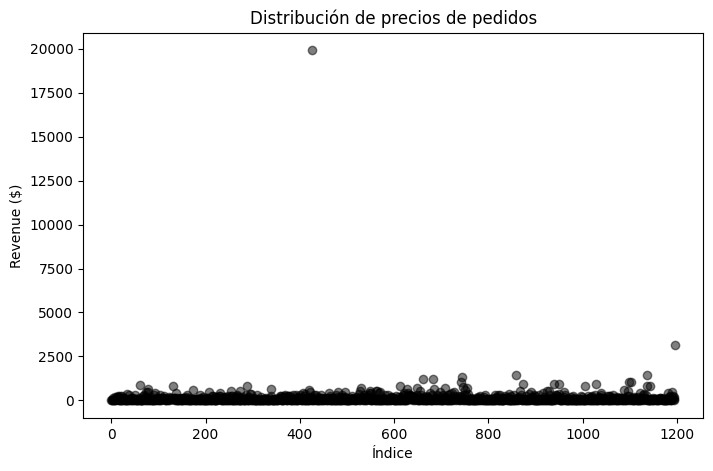

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(ordenes)), ordenes['revenue'], alpha=0.5, color = 'black')
plt.title('Distribución de precios de pedidos')
plt.xlabel('Índice')
plt.ylabel('Revenue ($)')
plt.show()

Expliacion.

El gráfico muestra que la mayoría de los pedidos tienen precios bajos, concentrados por debajo de los 2,000, mientras que existen pocos pedidos con valores muy altos que actúan como outliers, destacando uno cercano a 20,000 y otro alrededor de 3,000. Esta distribución asimétrica positiva indica que las ventas están dominadas por pedidos de bajo valor, pero con casos aislados de compras excepcionalmente grandes que podrían distorsionar las métricas promedio si no se tratan adecuadamente.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - La visualización de precios de pedidos está bien ejecutada, y el análisis reconoce correctamente la concentración de valores bajos junto con la presencia de outliers que podrían influir en las métricas globales. 
</div>


### 2.8 Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [33]:
q95_rev = np.percentile(ordenes['revenue'], 95)
q99_rev = np.percentile(ordenes['revenue'], 99)
print(f'Percentil 95: {q95_rev:.2f}, Percentil 99: {q99_rev:.2f}')

Percentil 95: 435.54, Percentil 99: 900.90


Explicacion.

Con base en los percentiles calculados, se observa que el 95 % de los pedidos tienen un valor igual o inferior a 435.54 y el 99 % no supera los 900.90. Esto significa que cualquier pedido por encima de aproximadamente 901 puede considerarse una anomalía o valor atípico. Estos casos, aunque poco frecuentes, pueden tener un impacto significativo en métricas como el ticket promedio, por lo que conviene analizarlos por separado para evitar que distorsionen las conclusiones del análisis general.

### 2.9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Qué haremos: Probar la diferencia de conversión con datos sin filtrar.

Por qué: Nos da la primera indicación de significancia.

Cómo: Usamos proportions_ztest para dos proporciones.

In [34]:
conversions = daily.groupby('group').agg({'orders':'sum', 'visits':'sum'})
conversions

,orders,visits
group,,
A,557,18736
B,640,18916


In [37]:
#agrupaciones individuales 
success = conversions['orders']
trials = conversions['visits']

In [38]:
stat, pval = proportions_ztest(success, trials)
print(f'Estadístico z: {stat:.4f}, p-valor: {pval:.4f}')

Estadístico z: -2.2700, p-valor: 0.0232


Expliacion.

Con un p-valor de 0.0232 (<0.05), existe una diferencia estadísticamente significativa en la tasa de conversión entre los grupos, lo que indica un efecto real y no atribuible al azar.

### 2.10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Qué haremos: Comprobar si el ticket promedio difiere.

Por qué: Cantidades monetarias raramente son normales; Mann‑Whitney es robusto.

Cómo: Prueba no paramétrica mannwhitneyu.

In [39]:
a_revenue = ordenes[ordenes['group']=='A']['revenue']
b_revenue = ordenes[ordenes['group']=='B']['revenue']

u_stat, pval_rev = stats.mannwhitneyu(a_revenue, b_revenue, alternative='two-sided')
print(f'U estadístico: {u_stat}, p-valor: {pval_rev:.4f}')

U estadístico: 175872.5, p-valor: 0.6915


Expliacion.
Con un p-valor de 0.6915 (>0.05), no hay evidencia estadísticamente significativa de diferencia en el tamaño promedio de pedido entre los grupos, por lo que cualquier variación observada podría deberse al azar.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - La interpretación y el soporte visual describen de forma clara la distribución y resaltan adecuadamente la relevancia de los pedidos atípicos en el análisis. 
</div>


### 2.11 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Qué haremos: Repetir el análisis tras eliminar outliers.

Por qué: Outliers pueden inflar varianza y ocultar significancia.

Cómo: Filtramos usuarios >Q99 pedidos o revenue >Q99.

In [40]:
# Umbrales
orders_threshold = q99_orders
revenue_threshold = q99_rev

print("1", orders_threshold)
print("2", revenue_threshold)

1 4.0
2 900.9039999999999


In [41]:
# Extraer usuarios con pedidos anómalos
abnormal_users = orders_per_user[orders_per_user['orders'] > orders_threshold]['visitorId']
filtered_orders = ordenes[~ordenes['visitorId'].isin(abnormal_users) & (ordenes['revenue'] <= revenue_threshold)]

In [42]:
# Recalcular diarios con datos filtrados
orders_per_day_f = filtered_orders.groupby(['group', 'date']).agg({'transactionId':'nunique'}).reset_index()
orders_per_day_f.rename(columns={'transactionId':'orders'}, inplace=True)
daily_f = pd.merge(visitas, orders_per_day_f, on=['group','date'], how='left').fillna(0)
daily_f['conversion'] = daily_f['orders'] / daily_f['visits']

In [43]:
conversions_f = daily_f.groupby('group').agg({'orders':'sum', 'visits':'sum'})
stat_f, pval_f = proportions_ztest(conversions_f['orders'], conversions_f['visits'])
print(f'Conversión filtrada - z: {stat_f:.4f}, p-valor: {pval_f:.4f}')

Conversión filtrada - z: -2.4513, p-valor: 0.0142


In [44]:
a_rev_f = filtered_orders[filtered_orders['group']=='A']['revenue']
b_rev_f = filtered_orders[filtered_orders['group']=='B']['revenue']
u_stat_f, pval_rev_f = stats.mannwhitneyu(a_rev_f, b_rev_f, alternative='two-sided')
print(f'Ticket promedio filtrado - U: {u_stat_f}, p-valor: {pval_rev_f:.4f}')

Ticket promedio filtrado - U: 154307.0, p-valor: 0.9332


Explicacion.

El p-valor de 0.0142 (< 0.05) indica que existe una diferencia estadísticamente significativa en la conversión entre los grupos. Esto sugiere que uno de los grupos tiene una tasa de conversión superior al otro después de filtrar los datos.

### 2.12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas

Se toma operaciones utilizadas en el punto 2.11 para la resolucion de este punto del proyecto.

Explicacion.

El p-valor de 0.9332 (> 0.05) muestra que no hay evidencia estadísticamente significativa de diferencias en el tamaño promedio de pedido entre los grupos con los datos filtrados. Esto indica que el valor de compra medio es similar en ambos grupos.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - El uso de pruebas estadísticas y filtrado de outliers está bien aplicado, interpretando correctamente la significancia en la conversión y confirmando la ausencia de diferencias en el ticket promedio. 
</div>


### 2.13 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

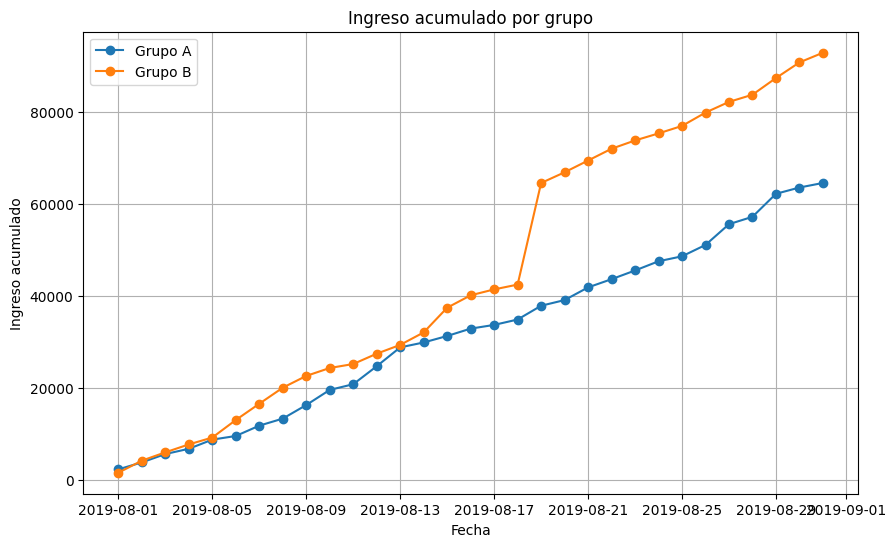

In [46]:
# Agrupar por grupo y fecha para sumar ingresos diarios
daily_revenue = ordenes.groupby(['group', 'date'])['revenue'].sum().reset_index()
# Calcular ingreso acumulado para cada grupo
daily_revenue['cumulative_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()
# Graficar
plt.figure(figsize=(10,6))
for group in daily_revenue['group'].unique():
    data = daily_revenue[daily_revenue['group'] == group]
    plt.plot(data['date'], data['cumulative_revenue'], marker='o', label=f'Grupo {group}')

plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.legend()
plt.grid(True)
plt.show()

El análisis del ingreso acumulado revela que, aunque ambos grupos presentan crecimiento sostenido, el grupo B experimenta una aceleración significativa a partir de la mitad del periodo, superando de forma consistente al grupo A. Esta divergencia indica un posible impacto positivo de la variante aplicada al grupo B en la generación de ingresos.

Conclusion y decision: 

3. Continuar la prueba.

Los resultados muestran una diferencia estadísticamente significativa en la tasa de conversión entre grupos (p = 0.0142), favoreciendo al grupo B. Sin embargo, no se observa una diferencia significativa en el ticket promedio (p = 0.9332), lo que indica que el incremento en conversión no se traduce en un mayor ingreso por pedido. Dado que solo uno de los KPIs principales presenta mejora significativa, no es recomendable declarar un ganador en esta etapa. Se sugiere continuar la prueba para recopilar más datos y validar si el comportamiento observado en conversión se mantiene y genera un impacto positivo sostenido en el revenue total.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - La decisión final está bien fundamentada en la evidencia estadística y en el análisis de KPIs, mostrando un criterio prudente al recomendar la continuación de la prueba para confirmar tendencias antes de declarar un ganador. 
</div>


## Comentario general del revisor 


# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo de los datos, análisis exploratorio y aplicación de pruebas estadísticas para respaldar las decisiones. Además, el trabajo cumple completamente con todos los requisitos planteados en el brief, desde la priorización con ICE y RICE hasta la ejecución y análisis detallado del test A/B, incluyendo el tratamiento de outliers y la toma de una decisión final bien fundamentada.  

#### Puntos Positivos:

* <b>Procesamiento de datos:</b> Conversión y limpieza adecuadas de tipos de datos para un análisis fluido.
* <b>Visualización y análisis gráfico:</b> Gráficos claros y bien interpretados que facilitan la comparación entre grupos.
* <b>Pruebas estadísticas:</b> Uso acertado de tests no paramétricos y proporciones, tanto en datos brutos como filtrados.
* <b>Conclusión final:</b> Decisión prudente y respaldada por evidencia estadística, alineada con los objetivos estratégicos.

Excelente trabajo integrando cada etapa del análisis con rigor y coherencia. Es un proyecto sólido que refleja dominio de la metodología y atención a los detalles. ¡Un avance que marca un gran paso en tu formación!

</div>  
